[View in Colaboratory](https://colab.research.google.com/github/skhimsara/CNN/blob/master/Image_Classification_Pretrained_Models.ipynb)

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, vgg19, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
  
#Load the VGG model
vgg19_model = vgg19.VGG19(weights='imagenet')

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

/Users/sidnpoo/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17227776/17225924 [==============================] - 7s 0us/step


In [4]:
##upload the image you want to classify. it will be in ./content

from google.colab import files
uploaded = files.upload()


Saving speaker.jpg to speaker.jpg


In [5]:
!ls

'/content'

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ['./speaker.jpg', './what.png',
            './yosemite-2560x1707-el-capitan-5k-wallpapers-winter-forest-osx-apple-3942.jpg',
            './tata.jpg']
##Local Run only
filenames = ['/Users/sidnpoo/Downloads/speaker.jpg', '/Users/sidnpoo/Downloads//what.png',
            '/Users/sidnpoo/Downloads//yosemite-2560x1707-el-capitan-5k-wallpapers-winter-forest-osx-apple-3942.jpg',
            '/Users/sidnpoo/Downloads//tata.jpg']

PIL image size (224, 224)


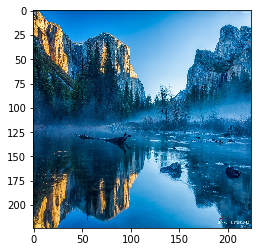

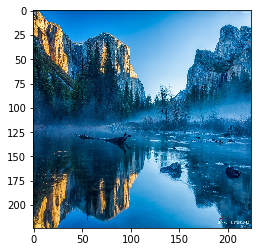

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


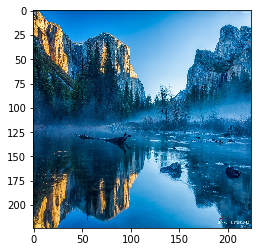

In [10]:
filename = filenames[2]

# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [11]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n09468604', 'valley', 0.39126447),
  ('n02980441', 'castle', 0.34277123),
  ('n09193705', 'alp', 0.1405159),
  ('n09332890', 'lakeside', 0.087961785),
  ('n09246464', 'cliff', 0.02906598)]]

In [12]:
# prepare the image for the inception_v3 model
processed_image = inception_v3.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n09468604', 'valley', 0.8616482),
  ('n09193705', 'alp', 0.08331854),
  ('n02980441', 'castle', 0.033677544),
  ('n09332890', 'lakeside', 0.01416663),
  ('n02859443', 'boathouse', 0.0010902957)]]

In [13]:

# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label


[[('n02980441', 'castle', 0.80104715),
  ('n09468604', 'valley', 0.07780904),
  ('n09332890', 'lakeside', 0.03616221),
  ('n03388043', 'fountain', 0.02905915),
  ('n09193705', 'alp', 0.025022352)]]

In [14]:

# prepare the image for the mobilenet model
processed_image = mobilenet.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n03388043', 'fountain', 0.39750242),
  ('n02980441', 'castle', 0.2803952),
  ('n09332890', 'lakeside', 0.16828936),
  ('n09468604', 'valley', 0.07299334),
  ('n09193705', 'alp', 0.018364802)]]

In [15]:
# prepare the image for the vgg19 model
processed_image = vgg19.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg19_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
label

[[('n09468604', 'valley', 0.345874),
  ('n09246464', 'cliff', 0.2636792),
  ('n09332890', 'lakeside', 0.16775438),
  ('n02980441', 'castle', 0.10342295),
  ('n09193705', 'alp', 0.059417933)]]

Reference : https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/
